In [1]:
import numpy as np
from IntBin import ReadI9BinaryFiles
import matplotlib.pyplot as plt
from scipy import optimize
from ParamOpt import Objective,trans,readdata,myreduce

In [8]:
%matplotlib notebook

In [2]:
#Read thed experimental images and simulated images
simdata,expdata=readdata('/work/yufengs/David/ReducedDavid/','/work/yufengs/David/Sim/',1,0)
#Reduce the images for better optimization performance
resim,reexp=myreduce(simdata,expdata)
#Wrap the cost function. Note that you need the parameters which were used for simulation 
def funcWrapper(x):
    return -Objective(x[0],x[1],x[2],resim,reexp,0.0629875,0.0715063,4.86407,1031.42,1997.13)

In [24]:
#Use a gradient based optimizer to find the global optimal
#If you want, you can try several random initial guesses to avoid local optimal
res=optimize.minimize(funcWrapper,[-20,5,7.5/0.00148],bounds=[(-30,30),(-20,20),(3000,5500)])
print res

      fun: -0.3393034835141554
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.27595720e-07,  -5.55111512e-08,   7.21644966e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 52
      nit: 9
   status: 0
  success: True
        x: array([  2.22218771e+01,  -3.58728420e+00,   4.60185536e+03])


In [25]:
#In this example, the result from IceNine Parameter Monte Carlo is:
#J=1049.43, K=1993.89, L=6.8019

print 'Initial J=',-20+1031.42, '  Final J=',res.x[0]+1031.42
print 'Initial K=',5+1997.13, '  Final K=',res.x[1]+1997.13
print 'Initial L=',7.5, '  Final L=',res.x[2]*0.00148

Initial J= 1011.42   Final J= 1053.64187707
Initial K= 2002.13   Final K= 1993.5427158
Initial L= 7.5   Final L= 6.81074593216


<IPython.core.display.Javascript object>


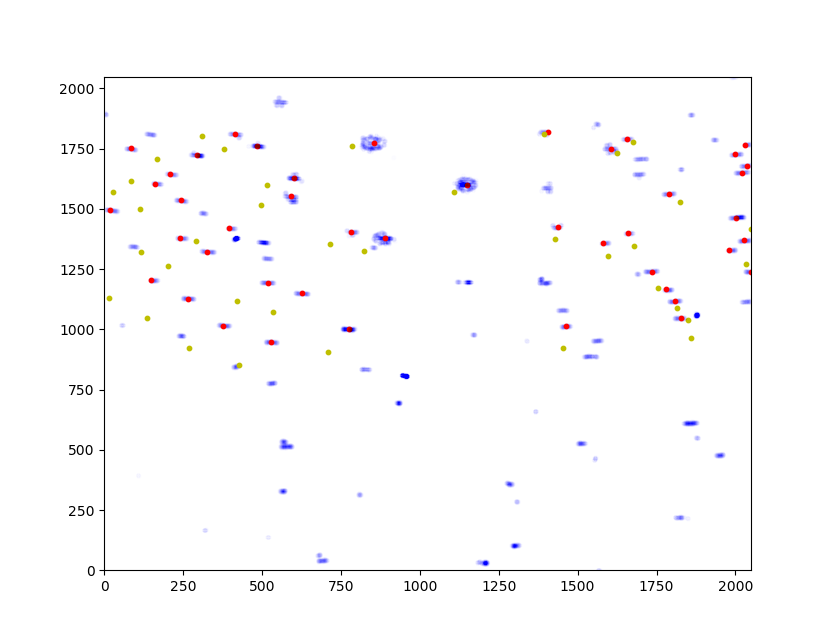

In [29]:
#Plot the results. For clearness, only plot first 50 frames which have simulated peaks.
#Blue peaks are the experiment images, yellow dots are the position of initial guess, red dots are the positions of 
#optimized results.

finalsim=trans(resim,0.0629875,0.0715063,4.86407,1031.42,1997.13,par={'L':4.6019e+03,'x':2.22e+01,'y':-3.587})
initsim=trans(resim,0.0629875,0.0715063,4.86407,1031.42,1997.13,par={'L':7.5/0.00148,'x':-20,'y':5})

for i in initsim.keys()[:50]:
    if i in expdata:
        plt.scatter(expdata[i][0][:,0],expdata[i][0][:,1],c='b',s=8,alpha=0.005)
    plt.scatter(finalsim[i][0][:,0],finalsim[i][0][:,1],c='r',s=10)
    plt.scatter(initsim[i][0][:,0],initsim[i][0][:,1],c='y',s=10)
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()